In [51]:
#warningはpythonの標準ライブラリ．
#FutureWarnigが邪魔なので非表示にする．動作に支障が無ければ問題ない．また最適化によって解が収束しないときに出るConvergenceWarningも邪魔なので非表示にする．
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=(FutureWarning, ConvergenceWarning))#対象のwarningsクラスはタプルで渡す必要があるらしい
import pprint
import sys
sys.path.append("/mnt/MachineLearning")
pprint.pprint(sys.path)

#各種モジュールのimport
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import statistics

from modules import show_mod
from modules.log_controler import ControlLog

from tqdm.notebook import tqdm

from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import BatchNormalization
from keras.layers import ReLU, LeakyReLU, PReLU
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from keras.backend import clear_session

import optuna

['/mnt/MachineLearning/MLTrial',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/mnt/MachineLearning',
 '/mnt/MachineLearning',
 '/mnt/MachineLearning']


In [52]:
#読み込むデータのパスの設定
current_dir_path = os.getcwd()
data_path = "/mnt/MachineLearning/data/"

df_read = pd.read_csv(f"{data_path}summary_20230418.csv", index_col="case_name")
df_read

,office,1_x,1_y,1_angle,2_x,2_y,2_angle,3_x,3_y,3_angle,...,4_angle,5_x,5_y,5_angle,size_x,size_y,aircon,ventilation,exhaust,countTimeMean_onlyFloating
case_name,,,,,,,,,,,,,,,,,,,,,
office1_0_0,office1,4.76,2.180,180.0,3.285,3.160,270.0,1.835,3.160,270.0,...,90.0,2.885,1.241,90.0,6.0,5.5,0.0,0.0,off,2991.405667
office1_0_123_aout,office1,4.76,2.180,180.0,3.285,3.160,270.0,1.835,3.160,270.0,...,90.0,2.885,1.241,90.0,6.0,5.5,0.0,123.0,a,2656.982333
office1_0_123_bout,office1,4.76,2.180,180.0,3.285,3.160,270.0,1.835,3.160,270.0,...,90.0,2.885,1.241,90.0,6.0,5.5,0.0,123.0,b,2951.144667
office1_0_164_aout,office1,4.76,2.180,180.0,3.285,3.160,270.0,1.835,3.160,270.0,...,90.0,2.885,1.241,90.0,6.0,5.5,0.0,164.0,a,2470.395667
office1_0_164_bout,office1,4.76,2.180,180.0,3.285,3.160,270.0,1.835,3.160,270.0,...,90.0,2.885,1.241,90.0,6.0,5.5,0.0,164.0,b,3271.053000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
office33_960_164_bout,office33,0.77,4.735,270.0,4.770,4.735,270.0,8.770,4.735,270.0,...,270.0,8.770,0.985,270.0,9.5,6.0,960.0,164.0,b,2504.354667
office33_960_246_aout,office33,0.77,4.735,270.0,4.770,4.735,270.0,8.770,4.735,270.0,...,270.0,8.770,0.985,270.0,9.5,6.0,960.0,246.0,a,1331.682000
office33_960_246_bout,office33,0.77,4.735,270.0,4.770,4.735,270.0,8.770,4.735,270.0,...,270.0,8.770,0.985,270.0,9.5,6.0,960.0,246.0,b,1495.644000


In [53]:
office_array = df_read["office"].unique()
office_array

array(['office1', 'office2', 'office3', 'office4', 'office5', 'office6',
       'office7', 'office8', 'office9', 'office10', 'office11',
       'office12', 'office13', 'office14', 'office15', 'office16',
       'office17', 'office18', 'office19', 'office20', 'office21',
       'office22', 'office23', 'office24', 'office25', 'office26',
       'office27', 'office28', 'office30', 'office31', 'office32',
       'office33'], dtype=object)

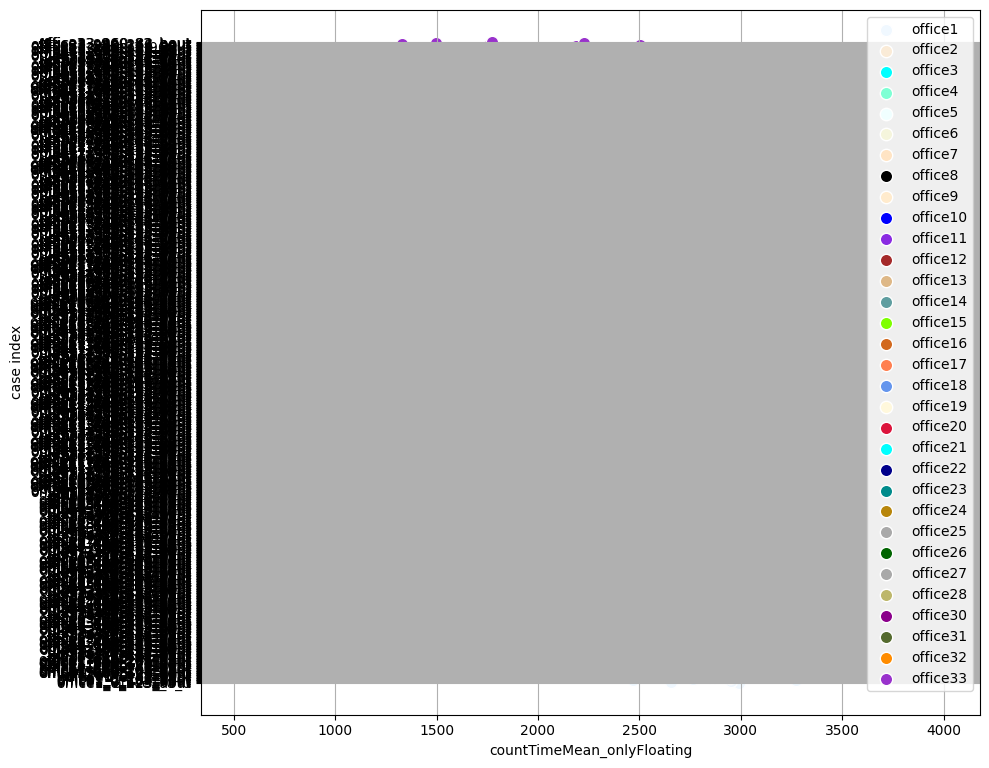

In [54]:
RoI_name = "countTimeMean_onlyFloating"

plt.figure(figsize=[10, 8])

#カラーマップ等の準備
markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
colors = list(matplotlib.colors.CSS4_COLORS.values())

for idx, target_office_name in enumerate(office_array):
    df = df_read[df_read["office"]==target_office_name]
    plt.scatter(df[RoI_name], df.index, 
                s=80, c=colors[idx], marker=markers[2], edgecolor="white", label=target_office_name)
    

plt.ylabel("case index")
plt.xlabel(RoI_name)
plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

In [12]:
c = list(matplotlib.colors.CSS4_COLORS.values())

In [55]:
df_read

,office,1_x,1_y,1_angle,2_x,2_y,2_angle,3_x,3_y,3_angle,...,4_angle,5_x,5_y,5_angle,size_x,size_y,aircon,ventilation,exhaust,countTimeMean_onlyFloating
case_name,,,,,,,,,,,,,,,,,,,,,
office1_0_0,office1,4.76,2.180,180.0,3.285,3.160,270.0,1.835,3.160,270.0,...,90.0,2.885,1.241,90.0,6.0,5.5,0.0,0.0,off,2991.405667
office1_0_123_aout,office1,4.76,2.180,180.0,3.285,3.160,270.0,1.835,3.160,270.0,...,90.0,2.885,1.241,90.0,6.0,5.5,0.0,123.0,a,2656.982333
office1_0_123_bout,office1,4.76,2.180,180.0,3.285,3.160,270.0,1.835,3.160,270.0,...,90.0,2.885,1.241,90.0,6.0,5.5,0.0,123.0,b,2951.144667
office1_0_164_aout,office1,4.76,2.180,180.0,3.285,3.160,270.0,1.835,3.160,270.0,...,90.0,2.885,1.241,90.0,6.0,5.5,0.0,164.0,a,2470.395667
office1_0_164_bout,office1,4.76,2.180,180.0,3.285,3.160,270.0,1.835,3.160,270.0,...,90.0,2.885,1.241,90.0,6.0,5.5,0.0,164.0,b,3271.053000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
office33_960_164_bout,office33,0.77,4.735,270.0,4.770,4.735,270.0,8.770,4.735,270.0,...,270.0,8.770,0.985,270.0,9.5,6.0,960.0,164.0,b,2504.354667
office33_960_246_aout,office33,0.77,4.735,270.0,4.770,4.735,270.0,8.770,4.735,270.0,...,270.0,8.770,0.985,270.0,9.5,6.0,960.0,246.0,a,1331.682000
office33_960_246_bout,office33,0.77,4.735,270.0,4.770,4.735,270.0,8.770,4.735,270.0,...,270.0,8.770,0.985,270.0,9.5,6.0,960.0,246.0,b,1495.644000


In [56]:
# 排気口位置a,b,offをダミー変数化
df_read = pd.get_dummies(df_read, columns=['exhaust'])
print(df_read.info())

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, office1_0_0 to office33_960_82_bout
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   office                      907 non-null    object 
 1   1_x                         907 non-null    float64
 2   1_y                         907 non-null    float64
 3   1_angle                     907 non-null    float64
 4   2_x                         907 non-null    float64
 5   2_y                         907 non-null    float64
 6   2_angle                     907 non-null    float64
 7   3_x                         907 non-null    float64
 8   3_y                         907 non-null    float64
 9   3_angle                     907 non-null    float64
 10  4_x                         907 non-null    float64
 11  4_y                         907 non-null    float64
 12  4_angle                     907 non-null    float64
 13  5_x          

In [143]:
# 説明変数と目的変数の定義
explanatory_variable =['aircon', 'ventilation', '1_x', '1_y', '1_angle', '2_x', '2_y', '2_angle', '3_x', '3_y', '3_angle', '4_x', '4_y', '4_angle', '5_x', '5_y', '5_angle', 
                       'size_x','size_y', 'exhaust_a', 'exhaust_b', 'exhaust_off']
# , '1_x', '1_y', '1_angle', '2_x', '2_y', '2_angle', '3_x', '3_y', '3_angle', '4_x', '4_y', '4_angle', '5_x', '5_y', '5_angle',

# df_total = df_total.set_index("case_name")

df_explanatory_variable = df_read[explanatory_variable]
df_objective_variable = df_read[RoI_name]

In [146]:
# df_explanatory_variable
df_objective_variable

case_name
office1_0_0              2991.405667
office1_0_123_aout       2656.982333
office1_0_123_bout       2951.144667
office1_0_164_aout       2470.395667
office1_0_164_bout       3271.053000
                            ...     
office33_960_164_bout    2504.354667
office33_960_246_aout    1331.682000
office33_960_246_bout    1495.644000
office33_960_82_aout     2227.621000
office33_960_82_bout     1771.486667
Name: countTimeMean_onlyFloating, Length: 907, dtype: float64

In [147]:
#説明変数の標準化(only explanatory variable)
stdscaler = preprocessing.StandardScaler()
stdscaler.fit(df_explanatory_variable)
np_explanatory_variable_std = stdscaler.transform(df_explanatory_variable)
df_explanatory_variable_std = pd.DataFrame(np_explanatory_variable_std, index=df_explanatory_variable.index, columns=df_explanatory_variable.columns)
df_explanatory_variable_std

,aircon,ventilation,1_x,1_y,1_angle,2_x,2_y,2_angle,3_x,3_y,...,4_y,4_angle,5_x,5_y,5_angle,size_x,size_y,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,,,,,,,,,,,,,,,,,
office1_0_0,-1.387753,-1.665425,0.522104,-0.735087,0.992312,-0.762624,0.088706,1.417697,-0.838830,-0.051581,...,-0.854755,-0.460464,-0.596420,-0.402515,-0.460464,-1.576268,-0.172987,-0.868534,-0.868534,2.478252
office1_0_123_aout,-1.387753,-0.204554,0.522104,-0.735087,0.992312,-0.762624,0.088706,1.417697,-0.838830,-0.051581,...,-0.854755,-0.460464,-0.596420,-0.402515,-0.460464,-1.576268,-0.172987,1.151365,-0.868534,-0.403510
office1_0_123_bout,-1.387753,-0.204554,0.522104,-0.735087,0.992312,-0.762624,0.088706,1.417697,-0.838830,-0.051581,...,-0.854755,-0.460464,-0.596420,-0.402515,-0.460464,-1.576268,-0.172987,-0.868534,1.151365,-0.403510
office1_0_164_aout,-1.387753,0.282403,0.522104,-0.735087,0.992312,-0.762624,0.088706,1.417697,-0.838830,-0.051581,...,-0.854755,-0.460464,-0.596420,-0.402515,-0.460464,-1.576268,-0.172987,1.151365,-0.868534,-0.403510
office1_0_164_bout,-1.387753,0.282403,0.522104,-0.735087,0.992312,-0.762624,0.088706,1.417697,-0.838830,-0.051581,...,-0.854755,-0.460464,-0.596420,-0.402515,-0.460464,-1.576268,-0.172987,-0.868534,1.151365,-0.403510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
office33_960_164_bout,1.293167,0.282403,-1.432102,1.206156,2.063772,0.130320,1.506970,1.417697,1.836294,1.091594,...,-1.069781,1.294328,1.793071,-0.643274,1.294328,1.152119,0.527456,-0.868534,1.151365,-0.403510
office33_960_246_aout,1.293167,1.256316,-1.432102,1.206156,2.063772,0.130320,1.506970,1.417697,1.836294,1.091594,...,-1.069781,1.294328,1.793071,-0.643274,1.294328,1.152119,0.527456,1.151365,-0.868534,-0.403510
office33_960_246_bout,1.293167,1.256316,-1.432102,1.206156,2.063772,0.130320,1.506970,1.417697,1.836294,1.091594,...,-1.069781,1.294328,1.793071,-0.643274,1.294328,1.152119,0.527456,-0.868534,1.151365,-0.403510


In [148]:
from sklearn.model_selection import train_test_split
train_explanatory_variable, test_explanatory_variable = train_test_split(df_explanatory_variable_std, test_size=0.3, random_state=0)
train_explanatory_variable
test_explanatory_variable

,aircon,ventilation,1_x,1_y,1_angle,2_x,2_y,2_angle,3_x,3_y,...,4_y,4_angle,5_x,5_y,5_angle,size_x,size_y,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,,,,,,,,,,,,,,,,,
office9_660_164_bout,0.455379,0.282403,-1.189173,-0.575533,-1.150609,-1.976665,-1.910371,-1.393931,-0.383268,-0.610466,...,-1.107579,-1.337860,0.167324,-0.685594,-1.337860,0.762350,-2.274316,-0.868534,1.151365,-0.403510
office17_0_164_aout,-1.387753,0.282403,1.499207,-1.544255,-0.079149,1.913199,-0.424570,0.480488,1.437051,0.587146,...,1.832230,-1.337860,0.593656,1.242358,-1.337860,0.762350,-0.873430,1.151365,-0.868534,-0.403510
office18_360_164_bout,-0.382408,0.282403,-0.041138,0.659873,-0.079149,0.304699,0.859522,-0.456722,-0.269859,-1.630251,...,-1.069781,1.294328,0.753632,-0.643274,1.294328,0.762350,-0.873430,-0.868534,1.151365,-0.403510
office17_960_82_aout,1.293167,-0.691511,1.499207,-1.544255,-0.079149,1.913199,-0.424570,0.480488,1.437051,0.587146,...,1.832230,-1.337860,0.593656,1.242358,-1.337860,0.762350,-0.873430,1.151365,-0.868534,-0.403510
office5_960_0,1.293167,-1.665425,0.242932,0.324809,-0.079149,-1.090337,0.462408,-0.456722,-1.041344,-1.426294,...,-0.833756,-0.460464,-0.058429,-0.379003,-0.460464,-1.576268,-0.172987,-0.868534,-0.868534,2.478252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
office2_360_246_aout,-0.382408,1.256316,0.042124,-1.430288,-0.079149,0.124306,-0.289498,0.480488,0.289467,0.696019,...,1.958222,-1.337860,-0.614692,1.383427,-1.337860,-1.576268,-0.172987,1.151365,-0.868534,-0.403510
office16_660_164_bout,0.455379,0.282403,1.979188,-0.488158,0.992312,1.026269,0.381364,1.417697,0.308754,0.184312,...,-0.581773,-0.460464,0.022777,-0.096864,-0.460464,0.762350,-0.873430,-0.868534,1.151365,-0.403510
office13_660_246_aout,0.455379,1.256316,-1.534955,1.419655,-0.079149,-1.529292,1.760007,-0.456722,-1.184069,-1.630977,...,-1.070621,1.294328,-0.208661,-0.644214,1.294328,-0.796728,0.527456,1.151365,-0.868534,-0.403510


In [149]:
train_data_index = train_explanatory_variable.index
test_data_index = test_explanatory_variable.index

In [150]:
train_objective_variable = df_objective_variable.loc[train_data_index]
test_objective_variable = df_objective_variable.loc[test_data_index]
train_objective_variable
test_objective_variable

case_name
office9_660_164_bout     2120.489333
office17_0_164_aout      2312.477333
office18_360_164_bout    1112.169333
office17_960_82_aout     1891.114000
office5_960_0            1147.780000
                            ...     
office2_360_246_aout     1345.297333
office16_660_164_bout    1335.910333
office13_660_246_aout    1297.799333
office28_960_0           1610.133667
office4_960_0            1281.343667
Name: countTimeMean_onlyFloating, Length: 273, dtype: float64

In [137]:
#MLPを定義するクラス
class MLP:
    def __init__(self, params):
        self.params = params
        self.model = None
    
    def fit(self, tr_x, tr_y, va_x, va_y, verbose=0, callback_type="early_stopping"):
        
        #パラメータの読み込み
        input_dropout = self.params["input_dropout"]
        hidden_layers = self.params["hidden_layers"]
        hidden_units = self.params["hidden_units"]
        kernel_initializer = self.params["kernel_initializer"]
        hidden_activation = self.params["hidden_activation"]
        hidden_dropout = self.params["hidden_dropout"]
        batch_norm = self.params["batch_norm"]
        optimizer_type = self.params["optimizer_type"]
        optimizer_lr = self.params["optimizer_lr"]
        batch_size = self.params["batch_size"]
        
        #モデルの定義
        self.model = keras.Sequential()
        
        #入力層，kerasはSequentialモデルを作ったとき最初のlayerにinput_shapeまたはinput_dimで入力の形状をtupleで与える必要がある
        self.model.add(Dropout(rate=input_dropout, input_shape=(tr_x.shape[1],)))
        
        #中間層
        for i in range(hidden_layers):
            #全結合層
            self.model.add(Dense(units=hidden_units, kernel_initializer=kernel_initializer))
            #バッチ正規化の有無
            if batch_norm == "on":
                self.model.add(BatchNormalization())
            #活性化関数の選択
            if hidden_activation == "relu":
                self.model.add(ReLU())
            elif hidden_activation == "leaky_relu":
                self.model.add(LeakyReLU(alpha=0.01))
            elif hidden_activation == "prelu":
                self.model.add(PReLU())
            #指定のモノ以外が来たときには埋め込みエラーを吐く
            else:
                raise NotImplementedError
            #ドロップアウト
            self.model.add(Dropout(rate=hidden_dropout))
        
        #出力層
        self.model.add(Dense(1, kernel_initializer=kernel_initializer))

        
        #optimizerの選択
        if optimizer_type == "sgd":
            optimizer = optimizers.SGD(learning_rate=optimizer_lr)
        elif optimizer_type == "adam":
            optimizer = optimizers.Adam(learning_rate=optimizer_lr)
        elif optimizer_type == "rmsprop":
            optimizer = optimizers.RMSprop(learning_rate=optimizer_lr)
        #指定のモノ以外が来たときには埋め込みエラーを吐く
        else:
            raise NotImplementedError
        

        #モデルのcompile
        self.model.compile(loss="mse", optimizer=optimizer, metrics=["mae"])
        

        #学習時の設定
        #エポック
        max_epoch = 400

        #callbackの作成．今のところearlystoppingとtensorboardのみ実装
        #定めたパラメータの最小値更新が行われなければ打ち切り
        patience = 40
        if callback_type == "early_stopping":
            callbacks = [EarlyStopping(monitor="val_loss", patience=patience, verbose=verbose, restore_best_weights=False)]
        elif callback_type == "both":
            #決定したMLPの形状表示
            self.model.summary()
            #tensorboard用のログディレクトリ作成
            control_log = ControlLog()
            log_file_name, log_dir_path = control_log.decide_filename(what_log="TensorBoardLogs")
            tb_log_dir = log_dir_path + log_file_name
            callbacks = [EarlyStopping(monitor="val_loss", patience=patience, verbose=verbose, restore_best_weights=True),
                         TensorBoard(log_dir=tb_log_dir, histogram_freq=1)]
            print("\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
            print("TensorBoardLogs path:", tb_log_dir)
            print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")

        history = self.model.fit(
            tr_x, tr_y, epochs=max_epoch, batch_size=batch_size, verbose=verbose,
            validation_data=(va_x, va_y), callbacks=callbacks
        )


        return history
        
    def predict(self, x):
        #モデルを使用して予測するときにindexを元データと揃えておかないとmean_squared_errorを計算するときにNanとなりerrorが起きる
        y_pred = pd.DataFrame(self.model.predict(x), index=x.index)
        return y_pred

In [142]:
#MLPを定義するクラス
class MLP:
    def __init__(self, params):
        self.params = params
        self.model = None
    
    def fit(self, tr_x, tr_y, va_x, va_y, verbose=0, callback_type="early_stopping"):
        
        #パラメータの読み込み
        input_dropout = self.params["input_dropout"]
        hidden_layers = self.params["hidden_layers"]
        hidden_units = self.params["hidden_units"]
        kernel_initializer = self.params["kernel_initializer"]
        hidden_activation = self.params["hidden_activation"]
        hidden_dropout = self.params["hidden_dropout"]
        batch_norm = self.params["batch_norm"]
        optimizer_type = self.params["optimizer_type"]
        optimizer_lr = self.params["optimizer_lr"]
        batch_size = self.params["batch_size"]
        
        #モデルの定義
        self.model = keras.Sequential()
        
        #入力層，kerasはSequentialモデルを作ったとき最初のlayerにinput_shapeまたはinput_dimで入力の形状をtupleで与える必要がある
        self.model.add(Dropout(rate=input_dropout, input_shape=(tr_x.shape[1],)))
        
        #中間層
        for i in range(hidden_layers):
            #全結合層
            self.model.add(Dense(units=hidden_units, kernel_initializer=kernel_initializer))
            #バッチ正規化の有無
            if batch_norm == "on":
                self.model.add(BatchNormalization())
            #活性化関数の選択
            if hidden_activation == "relu":
                self.model.add(ReLU())
            elif hidden_activation == "leaky_relu":
                self.model.add(LeakyReLU(alpha=0.01))
            elif hidden_activation == "prelu":
                self.model.add(PReLU())
            #指定のモノ以外が来たときには埋め込みエラーを吐く
            else:
                raise NotImplementedError
            #ドロップアウト
            self.model.add(Dropout(rate=hidden_dropout))
        
        #出力層
        self.model.add(Dense(1, kernel_initializer=kernel_initializer))
        
        #optimizerの選択
        if optimizer_type == "sgd":
            optimizer = optimizers.SGD(learning_rate=optimizer_lr)
        elif optimizer_type == "adam":
            optimizer = optimizers.Adam(learning_rate=optimizer_lr)
        elif optimizer_type == "rmsprop":
            optimizer = optimizers.RMSprop(learning_rate=optimizer_lr)
        #指定のモノ以外が来たときには埋め込みエラーを吐く
        else:
            raise NotImplementedError
        
        #モデルのcompile
        self.model.compile(loss="mse", optimizer=optimizer, metrics=["mae"])
        
        #学習時の設定
        #エポック
        max_epoch = 400

        #callbackの作成．今のところearlystoppingとtensorboardのみ実装
        #定めたパラメータの最小値更新が行われなければ打ち切り
        patience = 100
        if callback_type == "early_stopping":
            callbacks = [EarlyStopping(monitor="val_mae", patience=patience, verbose=verbose, restore_best_weights=True)]
        elif callback_type == "both":
            #決定したMLPの形状表示
            self.model.summary()
            #tensorboard用のログディレクトリ作成
            control_log = ControlLog()
            log_file_name, log_dir_path = control_log.decide_filename(what_log="TensorBoardLogs")
            tb_log_dir = log_dir_path + log_file_name
            callbacks = [EarlyStopping(monitor="val_mae", patience=patience, verbose=verbose, restore_best_weights=True),
                         TensorBoard(log_dir=tb_log_dir, histogram_freq=1)]
            print("TensorBoardLogs path:", tb_log_dir)

        history = self.model.fit(
            tr_x, tr_y, epochs=max_epoch, batch_size=batch_size, verbose=verbose,
            validation_data=(va_x, va_y), callbacks=callbacks
        )
        
        return history
        
    def predict(self, x):
        #モデルを使用して予測するときにindexを元データと揃えておかないとmean_squared_errorを計算するときにNanとなりerrorが起きる
        y_pred = pd.DataFrame(self.model.predict(x), index=x.index)
        return y_pred

In [67]:
class Objective:
    
    def __init__(self, X, y, n_trials, val_office_list):
        self.X = X
        self.y = y
        self.val_office_list = val_office_list
        
        #tqdm関連の設定
        self.bar = tqdm(total = n_trials)
        self.bar.set_description('Progress rate')
        
    def __call__(self, trial):
        # Clear clutter from previous Keras session graphs.
        clear_session()
        print("*** clear_session() occured ! ***")
        
        #ハイパーパラメータの空間設定
        params = {
            "input_dropout" : trial.suggest_float("input_dropout", 0.0, 0.2, step=0.05),
            "hidden_layers" : trial.suggest_int("hidden_layers", 3, 10),
            "hidden_units" : trial.suggest_int("hidden_units", 32, 256, step=32),
            "kernel_initializer" : trial.suggest_categorical("kernel_initializer", ["he_normal", "he_uniform", "random_normal"]),
            "hidden_activation" : trial.suggest_categorical("hidden_activation", ["relu", "leaky_relu", "prelu"]),
            "hidden_dropout" : trial.suggest_float("hidden_dropout", 0.0, 0.3, step=0.05),
            "batch_norm" : trial.suggest_categorical("batch_norm", ["on", "off"]),
            "optimizer_type" : trial.suggest_categorical("optimizer_type", ["adam", "rmsprop"]),
            "optimizer_lr" : trial.suggest_float("optimizer_lr", 1e-4, 1e-2, log=True),
            "batch_size" : trial.suggest_int("batch_size", 32, 128, step=32)
        }
        
        #MLP
        model = MLP(params)
        
        #最適化実行時の評価指標を格納するリスト
        scores = []
        
        #交差検証の分割方法を決定
       
        #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
        office_list = self.X.index.str.extract("(office+[0-9]{1,2})").to_numpy()
        
        for validate_office_name in self.val_office_list:
            #リスト内包表記
            validate_data_index = [i for i in range(office_list.shape[0]) if any(office_list[i] == validate_office_name)]
            #validate_data_index以外をtrain_data_indexとする
            train_data_bool = np.ones(office_list.shape[0], dtype = bool)
            train_data_bool[validate_data_index] = False
            train_data_index = np.arange(office_list.shape[0])[train_data_bool]
            
            #トレーニングデータ、検証用データの振り分け
            train_explanatory_variable = self.X.iloc[train_data_index]
            validate_explanatory_variable = self.X.iloc[validate_data_index]
            train_objective_variable = self.y.iloc[train_data_index]
            validate_objective_variable = self.y.iloc[validate_data_index]
            
            #データをシャッフルする
            train_explanatory_variable = train_explanatory_variable.sample(frac=1, random_state=1)
            train_objective_variable = train_objective_variable.reindex(index=train_explanatory_variable.index)
            validate_explanatory_variable = validate_explanatory_variable.sample(frac=1, random_state=1)
            validate_objective_variable = validate_objective_variable.reindex(index=validate_explanatory_variable.index)

            #評価指標の決定，k分割交差検証の実装
            history = model.fit(tr_x=train_explanatory_variable, tr_y=train_objective_variable, 
                                va_x=validate_explanatory_variable, va_y=validate_objective_variable)
                    
            #履歴の最後の１０エポック
            val_loss_list = history.history['val_loss'][-10:] #List of loss
            loss_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
            
            #評価関数の計算
            scores.append(loss_max)
            
        self.bar.update(1)
        
        return np.mean(scores)

In [140]:
class Objective:
    # train_test_split_version
    def __init__(self, X, y, n_trials):
        self.X = X
        self.y = y
        
        #tqdm関連の設定
        self.bar = tqdm(total = n_trials)
        self.bar.set_description('Progress rate')
        
    def __call__(self, trial):
        # Clear clutter from previous Keras session graphs.
        clear_session()
        print("*** clear_session() occured ! ***")
        
        #ハイパーパラメータの空間設定
        params = {
            "input_dropout" : trial.suggest_float("input_dropout", 0.0, 0.2, step=0.05),
            "hidden_layers" : trial.suggest_int("hidden_layers", 3, 10),
            "hidden_units" : trial.suggest_int("hidden_units", 32, 256, step=32),
            "kernel_initializer" : trial.suggest_categorical("kernel_initializer", ["he_normal", "he_uniform", "random_normal"]),
            "hidden_activation" : trial.suggest_categorical("hidden_activation", ["relu", "leaky_relu", "prelu"]),
            "hidden_dropout" : trial.suggest_float("hidden_dropout", 0.0, 0.3, step=0.05),
            "batch_norm" : trial.suggest_categorical("batch_norm", ["on", "off"]),
            "optimizer_type" : trial.suggest_categorical("optimizer_type", ["adam", "rmsprop"]),
            "optimizer_lr" : trial.suggest_float("optimizer_lr", 1e-4, 1e-2, log=True),
            "batch_size" : trial.suggest_int("batch_size", 32, 128, step=32)
        }
        
        #MLP
        model = MLP(params)
        
        #最適化実行時の評価指標を格納するリスト
        scores = []
        
        #k分割交差検証の実装
        #評価指標の決定
        metrics = ["neg_mean_squared_error", "neg_mean_absolute_error"]
        #交差検証の分割方法を決定
        kf = KFold(n_splits=5, shuffle=True, random_state=1)
        for i, (train_index, test_index) in enumerate(kf.split(X=self.X, y=self.y)):
            print(f"Fold {i}:")
            # print(f"  Train: index={train_index}")
            print(f"  Test:  index={test_index}")

            tr_x=self.X.iloc[train_index]
            tr_y=self.y.iloc[train_index]
            va_x=self.X.iloc[test_index]
            va_y=self.y.iloc[test_index]

            #評価指標の決定，k分割交差検証の実装
            # history = model.fit(tr_x=self.X.iloc[train_index], tr_y=self.y.iloc[train_index], 
            #                     va_x=self.X.iloc[test_index], va_y=self.y.iloc[test_index])
            history = model.fit(tr_x=tr_x, tr_y=tr_y, 
                                va_x=va_x, va_y=va_y)
            
            #履歴の最後の１０エポック
            val_loss_list = history.history['val_loss'][-10:] #List of loss
            loss_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
            
            #評価関数の計算
            scores.append(loss_max)
        
        # for validate_office_name in self.val_office_list:
        #     #リスト内包表記
        #     validate_data_index = [i for i in range(office_list.shape[0]) if any(office_list[i] == validate_office_name)]
        #     #validate_data_index以外をtrain_data_indexとする
        #     train_data_bool = np.ones(office_list.shape[0], dtype = bool)
        #     train_data_bool[validate_data_index] = False
        #     train_data_index = np.arange(office_list.shape[0])[train_data_bool]
            
        #     #トレーニングデータ、検証用データの振り分け
        #     train_explanatory_variable = self.X.iloc[train_data_index]
        #     validate_explanatory_variable = self.X.iloc[validate_data_index]
        #     train_objective_variable = self.y.iloc[train_data_index]
        #     validate_objective_variable = self.y.iloc[validate_data_index]
            
        #     #データをシャッフルする
        #     train_explanatory_variable = train_explanatory_variable.sample(frac=1, random_state=1)
        #     train_objective_variable = train_objective_variable.reindex(index=train_explanatory_variable.index)
        #     validate_explanatory_variable = validate_explanatory_variable.sample(frac=1, random_state=1)
        #     validate_objective_variable = validate_objective_variable.reindex(index=validate_explanatory_variable.index)

        #     #評価指標の決定，k分割交差検証の実装
        #     history = model.fit(tr_x=train_explanatory_variable, tr_y=train_objective_variable, 
        #                         va_x=validate_explanatory_variable, va_y=validate_objective_variable)
                    
        #     #履歴の最後の１０エポック
        #     val_loss_list = history.history['val_loss'][-10:] #List of loss
        #     loss_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
            
        #     #評価関数の計算
        #     scores.append(loss_max)
            
        self.bar.update(1)
        
        return np.mean(scores)

In [ ]:
model_name = "MLP"
#前回の続きから最適化を開始するかのスイッチ．Trueでリスタートする．
restart_switch = False

if restart_switch:
    #前回の続きから最適化を開始してみる(sutdy_nameが残っていないとできない．study_nameが残っていないときはoptunaログから自分で調査して与えればok)
#     study_name = 
    study = optuna.load_study(study_name=model_name+"_"+study_name[0], storage=sqlite_path)
    study.trials_dataframe()
    control_log = ControlLog()
    sqlite_path = control_log.set_log(*study_name)
    
else:
    control_log = ControlLog()
    sqlite_path = control_log.set_log()
    study_id = control_log.decide_filename()


#訓練時のパラメータ設定
n_trials=10
timeout=None

"""
最後のcontrol_log.kill_handler()が回らないとログが不必要に上書きされるので例外処理で最後まで必ず回るようにする．
exceptがtry内でエラーが生じたときの処理内容
finallyはtry内でエラーが生じたとき，生じなかったときどちらも動く処理
"""
try:
    """
    最終テスト用オフィスを切り替えながらチューニング実行
    """

    for test_office in test_office_list:
        print("test_office:", test_office)

        study_test_name = test_office + '_is_test'
        study_name = model_name+"_"+study_test_name+"_"+study_id[0]
        
        #交差検証用の検証データに使用するオフィスデータ
        val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
        
        #チューニングに使用するデータセットの決定（標準化するか否かなど）
        #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
        office_list = df_total.index.str.extract("(office+[0-9]{1,2})").to_numpy()
        #リスト内包表記
        test_data_index = [i for i in range(office_list.shape[0]) if any(office_list[i] == test_office)]
        #test_data_index以外をtrain_data_indexとする
        train_data_bool = np.ones(office_list.shape[0], dtype = bool)
        train_data_bool[test_data_index] = False
        train_data_index = np.arange(office_list.shape[0])[train_data_bool]
        
        #トレーニングデータ、テストデータの振り分け
        train_explanatory_variable = df_explanatory_variable_std.iloc[train_data_index]
        test_explanatory_variable = df_explanatory_variable_std.iloc[test_data_index]
        train_objective_variable = df_objective_variable_encoded.iloc[train_data_index]
        test_objective_variable = df_objective_variable_encoded.iloc[test_data_index]
    
        #ハイパーパラメータの探索
        objective = Objective(X=train_explanatory_variable, y=train_objective_variable, 
                               n_trials=n_trials, val_office_list=val_office_list)

        #計算資源があるときはランダムサーチ，無ければTPESampler
        #storageのパスにすでにDBファイルがあれば，それを読み込むのがload_if_exists
    #     study = optuna.create_study(directions=["minimize"], study_name=model_name+"_"+study_name[0],
    #                                 sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.HyperbandPruner(),
    #                                 storage=sqlite_path, load_if_exists=True)
        study = optuna.create_study(directions=["minimize"], study_name=study_name,
                                    sampler=optuna.samplers.RandomSampler(), pruner=optuna.pruners.MedianPruner(),
                                    storage=sqlite_path, load_if_exists=True)

        print(f"study name: {study_name}")

        #最適化の実行．n_trialsは何回実行するか．指定しなければできるだけやる．他にもtimeoutは計算にかける時間の上限値を秒単位で指定できる
        #n_trialsまたはtimeoutのどちらかは指定したほうが良い．でないと永遠に計算し続け，pcが重くなる．
        study.optimize(objective, n_trials=n_trials, timeout=timeout)

except Exception as error:
    print(error)

finally:
    #ハンドラの削除．これを行わないとログファイルが上書きされる．
    control_log.kill_handler()

In [151]:
model_name = "MLP"
#前回の続きから最適化を開始するかのスイッチ．Trueでリスタートする．
restart_switch = False

if restart_switch:
    #前回の続きから最適化を開始してみる(sutdy_nameが残っていないとできない．study_nameが残っていないときはoptunaログから自分で調査して与えればok)
#     study_name = 
    study = optuna.load_study(study_name=model_name+"_"+study_name[0], storage=sqlite_path)
    study.trials_dataframe()
    control_log = ControlLog()
    sqlite_path = control_log.set_log(*study_name)
    
else:
    control_log = ControlLog()
    sqlite_path = control_log.set_log()
    study_name = control_log.decide_filename()


#訓練時のパラメータ設定
n_trials=10
timeout=None

"""
最後のcontrol_log.kill_handler()が回らないとログが不必要に上書きされるので例外処理で最後まで必ず回るようにする．
exceptがtry内でエラーが生じたときの処理内容
finallyはtry内でエラーが生じたとき，生じなかったときどちらも動く処理
"""
try:
    #ハイパーパラメータの探索
    objective = Objective(X=train_explanatory_variable, y=train_objective_variable, n_trials=n_trials)

    #計算資源があるときはランダムサーチ，無ければTPESampler
    #storageのパスにすでにDBファイルがあれば，それを読み込むのがload_if_exists
#     study = optuna.create_study(directions=["minimize"], study_name=model_name+"_"+study_name[0],
#                                 sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.HyperbandPruner(),
#                                 storage=sqlite_path, load_if_exists=True)
    study = optuna.create_study(directions=["minimize"], study_name=model_name+"_"+study_name[0],
                                sampler=optuna.samplers.RandomSampler(), pruner=optuna.pruners.MedianPruner(),
                                storage=sqlite_path, load_if_exists=True)

    print(f"study name: {study_name[0]}")

    #最適化の実行．n_trialsは何回実行するか．指定しなければできるだけやる．他にもtimeoutは計算にかける時間の上限値を秒単位で指定できる
    #n_trialsまたはtimeoutのどちらかは指定したほうが良い．でないと永遠に計算し続け，pcが重くなる．
    study.optimize(objective, n_trials=n_trials, timeout=timeout)

except Exception as error:
    print(error)

finally:
    #ハンドラの削除．これを行わないとログファイルが上書きされる．
    control_log.kill_handler()

現在のログレベル: 20
SQLite file path: sqlite:///./OptunaLogs/2023-04-23/optuna.sqlite3


  0%|          | 0/10 [00:00<?, ?it/s]

study name: 44636
*** clear_session() occured ! ***
Fold 0:
  Test:  index=[  0  11  13  17  23  29  34  41  47  49  59  60  62  65  66  69  82  85
  88  90  92 101 107 111 119 120 132 135 148 159 160 165 172 179 181 185
 187 200 201 207 223 224 242 247 250 255 257 260 262 267 268 273 274 277
 284 286 291 301 305 312 314 323 328 329 333 339 347 351 353 358 361 362
 365 370 375 388 397 408 411 417 419 422 425 430 433 436 441 442 447 452
 472 474 481 484 493 495 501 507 509 510 520 523 527 529 533 545 547 550
 553 556 560 563 574 576 577 586 589 599 601 602 607 613 619 620 622 629
 631]


2023-04-23 04:46:39.312608: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:648] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Fold 1:
  Test:  index=[  3   4   5   9  16  19  31  38  39  40  42  52  56  57  61  67  68  74
  76  78  80  81  95  97 102 103 104 117 118 121 124 128 133 139 146 147
 157 161 162 173 180 186 189 192 195 197 214 218 233 236 241 245 259 261
 285 289 292 293 304 311 318 340 341 345 346 349 350 352 354 355 359 363
 364 368 371 373 376 377 378 380 386 392 400 402 404 406 407 410 414 423
 426 428 432 434 440 444 446 448 460 463 465 479 483 486 488 494 502 517
 518 519 522 526 535 552 568 571 572 578 579 582 592 594 596 603 604 608
 625]
Fold 2:
  Test:  index=[  1   2   6  12  14  18  27  30  36  46  51  54  58  70  73  89  91  93
  98 105 106 110 112 114 115 122 123 125 127 131 138 142 143 153 164 168
 171 174 182 191 203 204 208 213 217 220 221 225 230 232 237 238 239 240
 244 246 249 256 258 265 270 272 283 295 300 306 307 308 315 334 335 337
 342 344 360 374 379 382 383 385 395 396 409 415 421 427 445 449 457 458
 459 473 475 487 491 498 499 504 511 521 524 525 528 530 536 537 538 540

KeyboardInterrupt: 

In [132]:
a = train_objective_variable
b = test_objective_variable
# a = train_explanatory_variable
b.dtypes

office                         object
countTimeMean_onlyFloating    float64
dtype: object

In [1]:
import tqdm.autonotebook as tqdm

/tmp/ipykernel_215499/3788851053.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdm
